First we need to import the useful libraries and load the data that we have previously prepared.

In [3]:
import os
import h5py
import csv
import pickle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [6]:
#Load data and labels
print('\nLoading data...\n')

project_dir='/path/to/data'
file_name_h5 = os.path.join(project_dir, 'farmboys_data.h5')
h5f = h5py.File(file_name_h5,'r')
X = h5f['dataset'][:]
h5f.close()

y_list=[]
file_name_txt = os.path.join(project_dir, 'farmboys_labels.txt')
file = open(file_name_txt,"r") 
for line in file:
    y_list.append(line.strip())
y=np.asarray(y_list).astype(np.float64)

print('Samples loaded successfully:',X.shape)
print('Labels loaded successfully:',y.shape)


Loading data...

Samples loaded successfully: (200, 18)
Labels loaded successfully: (200,)


Now we create and train the Random Forest model, using 10-fold validation.

In [7]:
# Create model
model = RandomForestRegressor(n_estimators=100,criterion='mse',
                               max_depth=20,random_state=42)
print("\nModel created successfully!\n")


Model created successfully!



In [8]:
#Training the model
kf= KFold(n_splits=10,shuffle=True,random_state=42)

y_train=[]
y_test=[]
train_pred=[]
test_pred=[]
mse_train_results=[]
mse_test_results=[]
me_train_results=[]
me_test_results=[]
r2_train_results=[]
r2_test_results=[]

for train, test in kf.split(X,y): 
    y_train.append(y[train])
    y_test.append(y[test])
    model.fit(X[train],y[train])
    
    y_train_pred=model.predict(X[train])
    y_test_pred=model.predict(X[test])
    train_pred.append(y_train_pred)
    test_pred.append(y_test_pred)
    
    mse_train=mean_squared_error(y[train],y_train_pred)
    mse_test=mean_squared_error(y[test],y_test_pred)
    mse_train_results.append(mse_train)
    mse_test_results.append(mse_test)
    
    me_train=mean_absolute_error(y[train],y_train_pred)
    me_test=mean_absolute_error(y[test],y_test_pred)
    me_train_results.append(me_train)
    me_test_results.append(me_test)
    
    r2_train=r2_score(y[train],y_train_pred)
    r2_test=r2_score(y[test],y_test_pred)
    r2_train_results.append(r2_train)
    r2_test_results.append(r2_test)

print("\nTraining finished correctly!\n")


Training finished correctly!



Then we evaluate our predictions, using MAE (mean absolute error), MSE (mean squared error), and R2 (coefficient of determination).

In [9]:
print('Results:')
for i in range(len(mse_train_results)):
    print('\nK-fold: ',i+1)
    print('MSE train: {0:.3f}   MSE validation: {1:.3f}'.format(mse_train_results[i],
          mse_test_results[i]))
    print('MAE train: {0:.3f}   MAE validation: {1:.3f}'.format(me_train_results[i],
          me_test_results[i]))
    print('r^2 train: {0:.3f}   r^2 validation: {1:.3f}'.format(r2_train_results[i],
          r2_test_results[i]))

print('\nAverage values:')    
print('MSE train: {0:.3f}   MSE validation: {1:.3f}'.format(np.mean(mse_train_results),
      np.mean(mse_test_results)))
print('MAE train: {0:.3f}   MAE validation: {1:.3f}'.format(np.mean(me_train_results),
      np.mean(me_test_results)))
print('r^2 train: {0:.3f}   r^2 validation: {1:.3f}'.format(np.mean(r2_train_results),
      np.mean(r2_test_results)))

Results:

K-fold:  1
MSE train: 0.056   MSE validation: 0.297
MAE train: 0.125   MAE validation: 0.388
r^2 train: 0.881   r^2 validation: 0.711

K-fold:  2
MSE train: 0.050   MSE validation: 0.108
MAE train: 0.121   MAE validation: 0.213
r^2 train: 0.905   r^2 validation: 0.829

K-fold:  3
MSE train: 0.047   MSE validation: 0.146
MAE train: 0.122   MAE validation: 0.214
r^2 train: 0.917   r^2 validation: 0.360

K-fold:  4
MSE train: 0.054   MSE validation: 0.077
MAE train: 0.129   MAE validation: 0.177
r^2 train: 0.904   r^2 validation: 0.659

K-fold:  5
MSE train: 0.059   MSE validation: 0.102
MAE train: 0.137   MAE validation: 0.198
r^2 train: 0.890   r^2 validation: 0.794

K-fold:  6
MSE train: 0.049   MSE validation: 0.087
MAE train: 0.126   MAE validation: 0.162
r^2 train: 0.915   r^2 validation: -0.429

K-fold:  7
MSE train: 0.060   MSE validation: 0.044
MAE train: 0.141   MAE validation: 0.137
r^2 train: 0.892   r^2 validation: 0.872

K-fold:  8
MSE train: 0.049   MSE validation

We can see that the results are fairly good for the training set, and not so bad for validation. However, it is also important to have some visualization of the results.

Ideally, predictions should follow the red line in the middle. The residuals plot helps us to see if there are any patterns in the predictions.

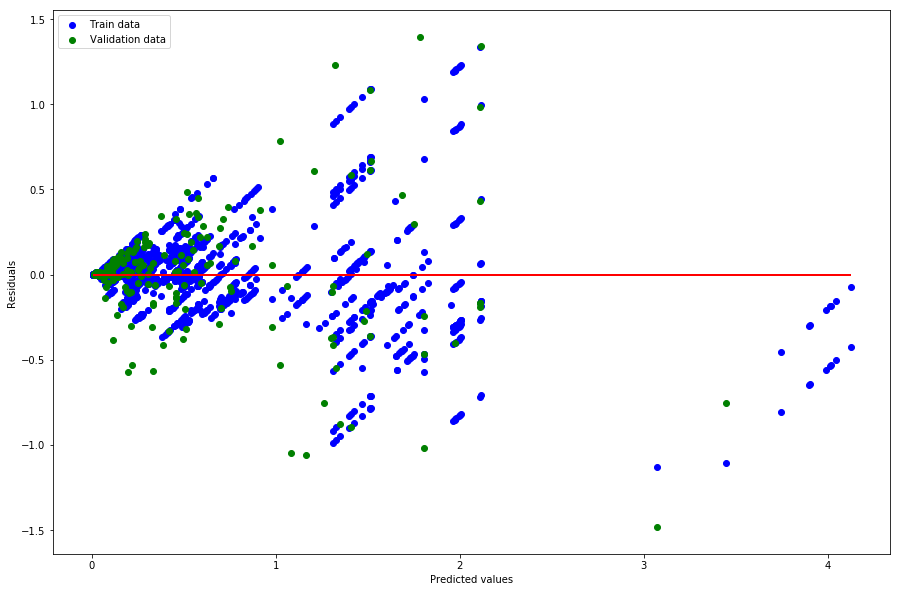

In [11]:
#Residuals plot
a=np.concatenate(train_pred)
b=np.concatenate(y_train)
diff_train=a-b

c=np.concatenate(test_pred)
d=np.concatenate(y_test)
diff_test=c-d

title='Residual_plot_RF'
plt.figure(title,figsize=(15,10))
plt.scatter(a,diff_train,c='blue',label='Train data')
plt.scatter(c,diff_test,c='green',label='Validation data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0,xmin=min(a),xmax=max(a),lw=2,color='red')
plt.show()

We also need to see how well the predictions fit the ground truth.

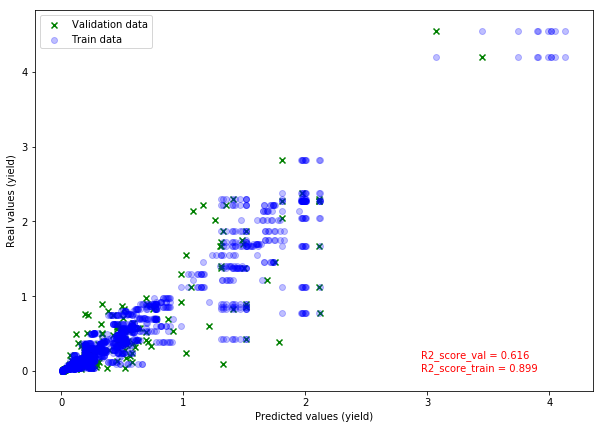

In [12]:
#Plot regression
title='Real_and_predicted_values_RF'
plt.figure(title,figsize=(10,7))
plt.scatter(c,d,c='green',marker='x',label='Validation data')
plt.scatter(a,b,c='blue',marker='o',label='Train data', alpha=0.25)
plt.xlabel('Predicted values (yield)')
plt.ylabel('Real values (yield)')
plt.legend(loc='upper left')
plt.text(max(c)-0.5,min(d),
         'R2_score_val = '+str(round(np.mean(r2_test_results),3))+
         '\nR2_score_train = '+str(round(np.mean(r2_train_results),3)),
         color='red')
plt.show()

Finally, we can save those results and the model, for future analysis and to predict future samples.

In [13]:
#Writing to CSV
file_summary=project_dir+'/results_summary_rf.csv'

with open(file_summary, 'w', newline='') as csvfile:
    results = csv.writer(csvfile, delimiter=',')
    results.writerow(['Average values (metrics):'])
    results.writerow(['MSE train:'])
    results.writerow([np.mean(mse_train_results)])
    results.writerow(['MSE validation:'])
    results.writerow([np.mean(mse_test_results)])
    results.writerow(['MAE train:'])
    results.writerow([np.mean(me_train_results)])
    results.writerow(['MAE validation:'])
    results.writerow([np.mean(me_test_results)])
    results.writerow(['r^2 train:'])
    results.writerow([np.mean(r2_train_results)])
    results.writerow(['r^2 validation:'])
    results.writerow([np.mean(r2_test_results)])

print("\nResults generated correctly!\n")

#Saving model
model_file=os.path.join(project_dir,'model_rf.sav')
pickle.dump(model, open(model_file, 'wb'))
print('Model saved correctly!')

print("\nJob finished! =) \n")


Results generated correctly!

Model saved correctly!

Job finished! =) 

